<a href="https://colab.research.google.com/github/Katla19/Delhivery-FE/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')

Dataset Link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

In [ ]:
import pandas as pd
a=pd.read_csv('d.csv')
print(a.head())

       data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VU

In [ ]:
a.shape

(144867, 24)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
a = a.drop(columns = unknown_fields)

In [ ]:
a['data'] = a['data'].astype('category')
a['route_type'] = a['route_type'].astype('category')

In [ ]:
floats = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance',
 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance','start_scan_to_end_scan']
for i in floats:
 print(a[i].max())

1927.4477046975032
4532.0
1686.0
2326.1991000000003
3051.0
1611.0
2191.4037000000003
7898.0


In [ ]:
for i in floats:
 a[i] = a[i].astype('float32')

In [ ]:
time = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in time:
 a[i] = pd.to_datetime(a[i])

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
a.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262939,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1036.997803,344.979126,598.096069,308.004333,421.117462,53.566002,14.770471,17.860197


In [ ]:
a.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
b = a.loc[a['source_name'].isnull(), 'source_center'].unique()
b

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
b = a.loc[a['destination_name'].isnull(), 'destination_center'].unique()
b

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

'IND331022A1B' ***
'IND221005A1A''IND250002AAC''IND331001A1C''IND122015AAC'

In [ ]:
d= a.loc[a['destination_center'] == 'IND331022A1B', 'destination_name']
d

,destination_name


In [ ]:
c = ['IND221005A1A', 'IND250002AAC', 'IND331001A1C', 'IND122015AAC']
d = a.loc[a['source_center'].isin(c), 'source_name']
d

,source_name


In [ ]:
# Replace null source_name with a unique name based on source_id
a.loc[a['source_name'].isnull(), 'source_name'] = 'source_' + a.loc[a['source_name'].isnull(), 'source_center'].astype(str)
# Replace null destination_name with a unique name based on destination_id
a.loc[a['destination_name'].isnull(), 'destination_name'] = 'destination_' + a.loc[a['destination_name'].isnull(), 'destination_center'].astype(str)

In [ ]:
a['trip_creation_time'].min(), a['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

trip_uuid for 1 package from actuall source to actuall destination is spread by multiple shipments

In [ ]:
merge = ['trip_uuid', 'source_center', 'destination_center']
aa = a.groupby(by = merge, as_index = False).agg({'data' : 'first',
 'route_type' : 'first',
 'trip_creation_time' : 'first',
'source_name' : 'first',
'destination_name' : 'last',
'od_start_time' : 'first',
'od_end_time' : 'first',
'start_scan_to_end_scan' : 'first',
'actual_distance_to_destination' : 'last',
'actual_time' : 'last',
'osrm_time' : 'last',
'osrm_distance' : 'last',
'segment_actual_time' : 'sum',
'segment_osrm_time' : 'sum',
'segment_osrm_distance' : 'sum'})


In [ ]:
aa['od_total_time'] = aa['od_end_time'] - aa['od_start_time']
aa.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
aa['od_total_time'] = aa['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
aa['od_total_time'].head()

,od_total_time
0,1260.60
1,999.51
2,58.83
3,122.78
4,834.64


In [ ]:
ab = aa.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
 'destination_center' : 'last',
'data' : 'first',
'route_type' : 'first',
'trip_creation_time' : 'first',
'source_name' : 'first',
'destination_name' : 'last',
'od_total_time' : 'sum',
'start_scan_to_end_scan' : 'sum',
'actual_distance_to_destination' : 'sum',
'actual_time' : 'sum',
'osrm_time' : 'sum',
'osrm_distance' : 'sum',
'segment_actual_time' : 'sum',
'segment_osrm_time' : 'sum',
'segment_osrm_distance' : 'sum'})


In [ ]:
def location_name_to_state(x):
  l = x.split('(')
  if len(l) == 1:
    return l[0]
  else:
    return l[1].replace(')', "")
def location_name_to_city(x):
  l = x.split('_')
  if 'location' in x:
    return 'unknown_city'
  else:
    return l[0]
def location_name_to_place(x):
    l = x.split()[0].split('_', 1)
    if len(l) == 1:
      return 'unknown_place'
    else:
      return l[1]
ab['source_city'] = ab['source_name'].apply(location_name_to_city)
ab['destination_city'] = ab['destination_name'].apply(location_name_to_city)
ab['source_state'] = ab['source_name'].apply(location_name_to_state)
ab['destination_state'] = ab['destination_name'].apply(location_name_to_state)
ab['source_place'] = ab['source_name'].apply(location_name_to_place)
ab['destination_place'] = ab['destination_name'].apply(location_name_to_place)

In [ ]:
b=[ab['source_city'].head(1),ab['source_state'].head(1),ab['destination_city'].head(1),ab['destination_state'].head(1),ab['source_place'].head(1),ab['destination_place'].head(1)]
b

[0    Kanpur
 Name: source_city, dtype: object,
 0    Uttar Pradesh
 Name: source_state, dtype: object,
 0    Kanpur
 Name: destination_city, dtype: object,
 0    Uttar Pradesh
 Name: destination_state, dtype: object,
 0    Central_H_6
 Name: source_place, dtype: object,
 0    Central_H_6
 Name: destination_place, dtype: object]

In [ ]:
ab['trip_creation_date'] = pd.to_datetime(ab['trip_creation_time'].dt.date)
ab['trip_creation_date'].head()

,trip_creation_date
0,2018-09-12
1,2018-09-12
2,2018-09-12
3,2018-09-12
4,2018-09-12


In [ ]:
ab['trip_creation_day'] = ab['trip_creation_time'].dt.day.astype('int8')
ab['trip_creation_month'] = ab['trip_creation_time'].dt.month.astype('int8')
ab['trip_creation_year'] = ab['trip_creation_time'].dt.year.astype('int16')
ab['trip_creation_week'] = ab['trip_creation_time'].dt.isocalendar().week.astype('int')
ab['trip_creation_hour'] = ab['trip_creation_time'].dt.hour.astype('int8')

In [ ]:
ab['trip_creation_year'].head()

,trip_creation_year
0,2018
1,2018
2,2018
3,2018
4,2018


In [ ]:
ab.shape

(14817, 29)

In [ ]:
ab.describe()

,trip_creation_time,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
count,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817,14817.000000,14817.000000,14817.0,14817.000000,14817.000000
mean,2018-09-22 12:44:19.555167744,531.697630,530.809998,164.477829,357.143768,161.384018,204.344711,353.892273,180.949783,223.201157,2018-09-21 23:46:58.627252736,18.370790,9.120672,2018.0,38.295944,12.449821
min,2018-09-12 00:00:16.535741,23.460000,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,2018-09-12 00:00:00,1.000000,9.000000,2018.0,37.000000,0.000000
25%,2018-09-17 02:51:25.129125888,149.930000,149.000000,22.837238,67.000000,29.000000,30.819201,66.000000,31.000000,32.654499,2018-09-17 00:00:00,14.000000,9.000000,2018.0,38.000000,4.000000
50%,2018-09-22 04:02:35.066945024,280.770000,280.000000,48.474072,149.000000,60.000000,65.618805,147.000000,65.000000,70.154404,2018-09-22 00:00:00,19.000000,9.000000,2018.0,38.000000,14.000000
75%,2018-09-27 19:37:41.898427904,638.200000,637.000000,164.583206,370.000000,168.000000,208.475006,367.000000,185.000000,218.802399,2018-09-27 00:00:00,25.000000,9.000000,2018.0,39.000000,20.000000
max,2018-10-03 23:59:42.701692,7898.550000,7898.000000,2186.531738,6265.000000,2032.000000,2840.081055,6230.000000,2564.000000,3523.632324,2018-10-03 00:00:00,30.000000,10.000000,2018.0,40.000000,23.000000
std,NaN,658.868223,658.707031,305.388123,561.395020,271.362549,370.395508,556.246826,314.541412,416.628326,NaN,7.893275,0.325757,0.0,0.967872,7.986553


In [ ]:
ab.describe(include = object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,938,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1042,Gurgaon_Bilaspur_HB (Haryana),821
source_city,14817,735,Gurgaon,1139
destination_city,14817,856,Bengaluru,1088
source_state,14817,34,Maharashtra,2714
destination_state,14817,39,Maharashtra,2561
source_place,14817,760,Bilaspur_HB,1063


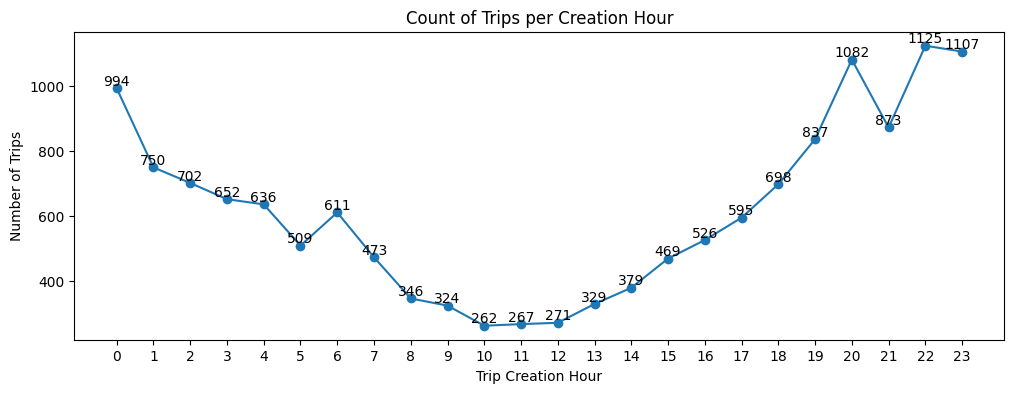

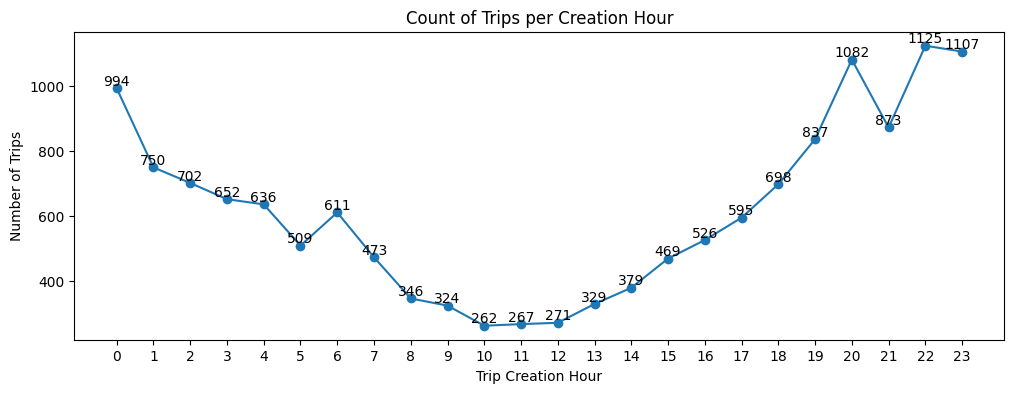

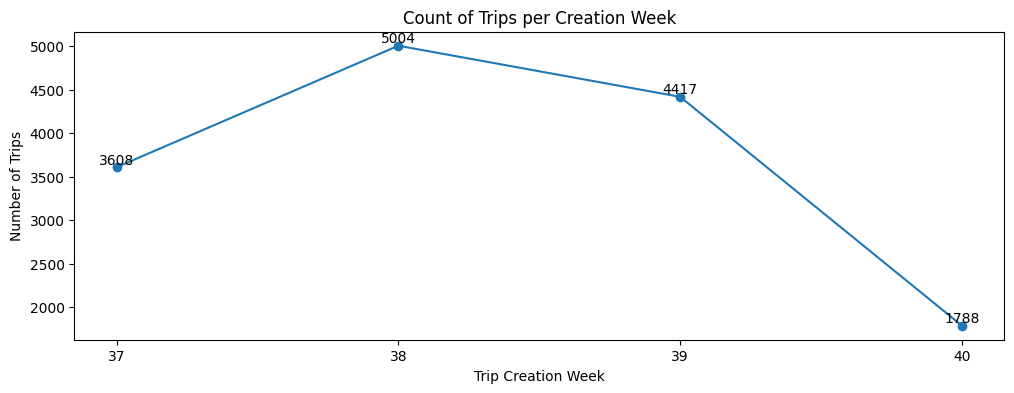

In [ ]:
plt.figure(figsize=(12, 4))
ab_grouped = ab.groupby('trip_creation_hour')['trip_uuid'].count().reset_index()
plt.plot(ab_grouped['trip_creation_hour'], ab_grouped['trip_uuid'], marker='o')
for x, y in zip(ab_grouped['trip_creation_hour'], ab_grouped['trip_uuid']):
    plt.annotate(str(y), xy=(x, y), ha='center', va='bottom')
plt.title('Count of Trips per Creation Hour')
plt.xlabel('Trip Creation Hour')
plt.ylabel('Number of Trips')
plt.xticks(ab_grouped['trip_creation_hour'])
plt.show()
plt.figure(figsize=(12, 4))
ab_grouped = ab.groupby('trip_creation_hour')['trip_uuid'].count().reset_index()
plt.plot(ab_grouped['trip_creation_hour'], ab_grouped['trip_uuid'], marker='o')
for x, y in zip(ab_grouped['trip_creation_hour'], ab_grouped['trip_uuid']):
    plt.annotate(str(y), xy=(x, y), ha='center', va='bottom')
plt.title('Count of Trips per Creation Hour')
plt.xlabel('Trip Creation Hour')
plt.ylabel('Number of Trips')
plt.xticks(ab_grouped['trip_creation_hour'])
plt.show()
plt.figure(figsize=(12, 4))
ab_grouped = ab.groupby('trip_creation_week')['trip_uuid'].count().reset_index()
plt.plot(ab_grouped['trip_creation_week'], ab_grouped['trip_uuid'], marker='o')
for x, y in zip(ab_grouped['trip_creation_week'], ab_grouped['trip_uuid']):
    plt.annotate(str(y), xy=(x, y), ha='center', va='bottom')
plt.title('Count of Trips per Creation Week')
plt.xlabel('Trip Creation Week')
plt.ylabel('Number of Trips')
plt.xticks(ab_grouped['trip_creation_week'])
plt.show()

In [ ]:
print(ab['trip_creation_month'].unique())

[ 9 10]


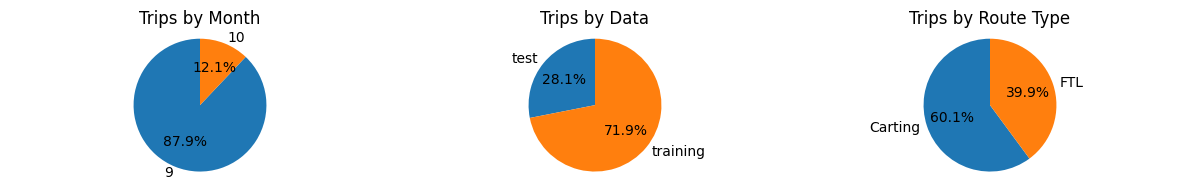

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 2))
monthly_trips = ab.groupby('trip_creation_month')['trip_uuid'].count()
axes[0].pie(monthly_trips, labels=monthly_trips.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Trips by Month')
axes[0].axis('equal')
monthly_trips_by_data = ab.groupby('data')['trip_uuid'].count()
axes[1].pie(monthly_trips_by_data, labels=monthly_trips_by_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Trips by Data')
axes[1].axis('equal')
route_type_counts = ab['route_type'].value_counts()
axes[2].pie(route_type_counts, labels=route_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Trips by Route Type')
axes[2].axis('equal')
plt.tight_layout()
plt.show()

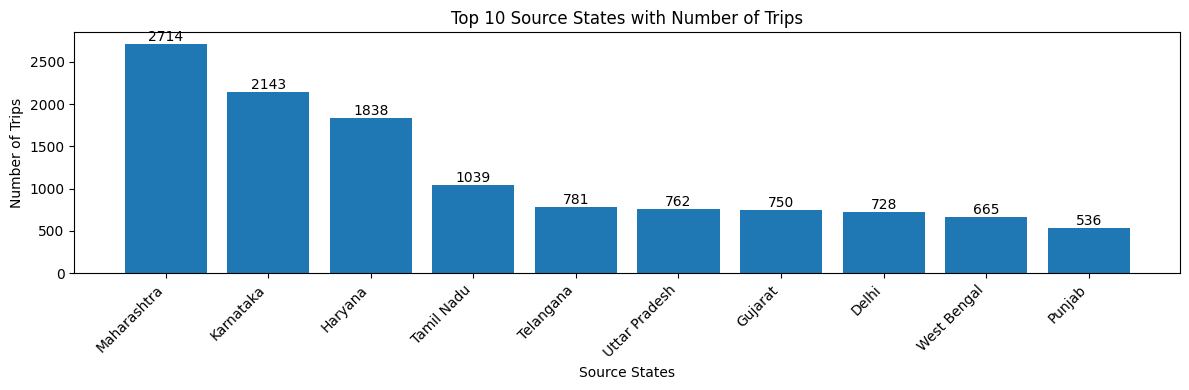

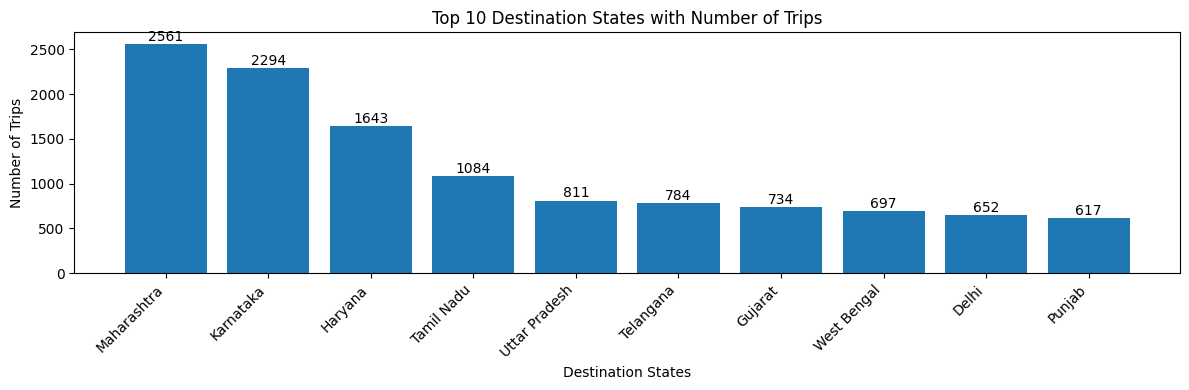

In [ ]:
top_10_source_states = ab['source_state'].value_counts().head(10)
plt.figure(figsize=(12, 4))
plt.bar(top_10_source_states.index, top_10_source_states.values)
plt.xlabel("Source States")
plt.ylabel("Number of Trips")
plt.title("Top 10 Source States with Number of Trips")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_source_states.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()
top_10_source_states = ab['destination_state'].value_counts().head(10)
plt.figure(figsize=(12, 4))
plt.bar(top_10_source_states.index, top_10_source_states.values)
plt.xlabel("Destination States")
plt.ylabel("Number of Trips")
plt.title("Top 10 Destination States with Number of Trips")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_source_states.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

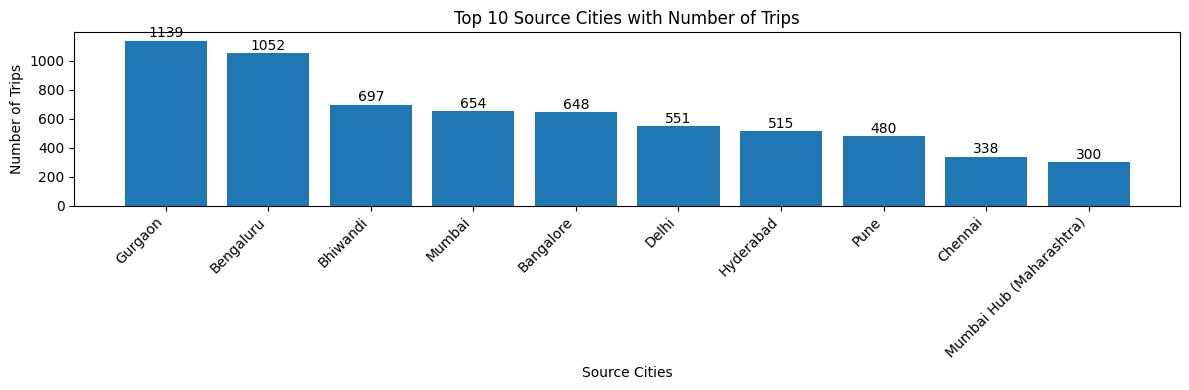

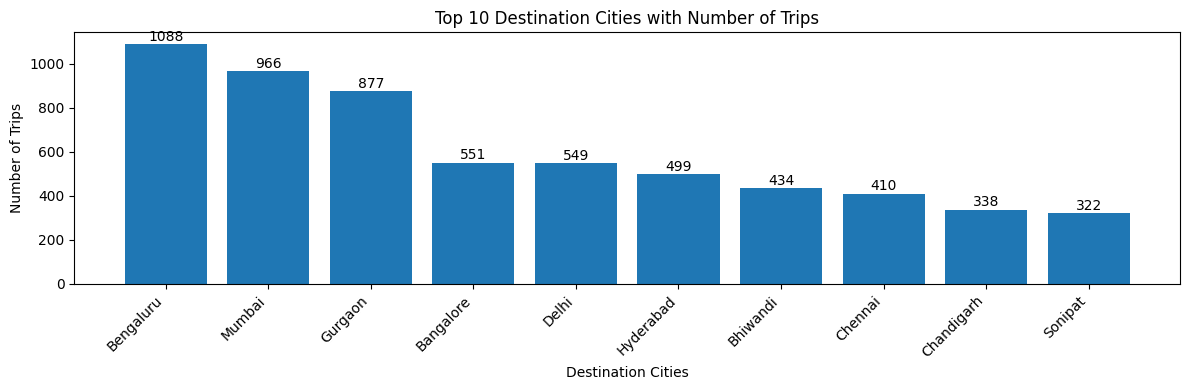

In [ ]:
top_10_source_cities = ab['source_city'].value_counts().head(10)
plt.figure(figsize=(12, 4))
plt.bar(top_10_source_cities.index, top_10_source_cities.values)
plt.xlabel("Source Cities")
plt.ylabel("Number of Trips")
plt.title("Top 10 Source Cities with Number of Trips")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_source_cities.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()
top_10_source_cities = ab['destination_city'].value_counts().head(10)
plt.figure(figsize=(12, 4))
plt.bar(top_10_source_cities.index, top_10_source_cities.values)
plt.xlabel("Destination Cities")
plt.ylabel("Number of Trips")
plt.title("Top 10 Destination Cities with Number of Trips")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_source_cities.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

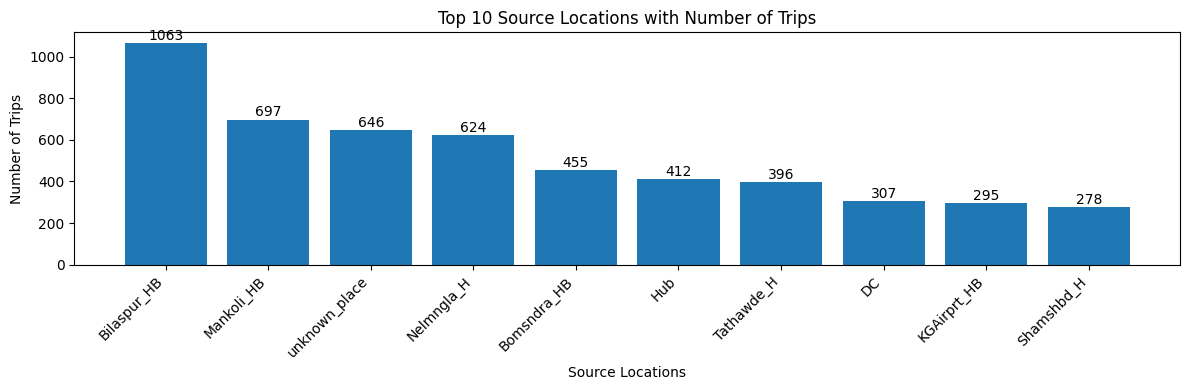

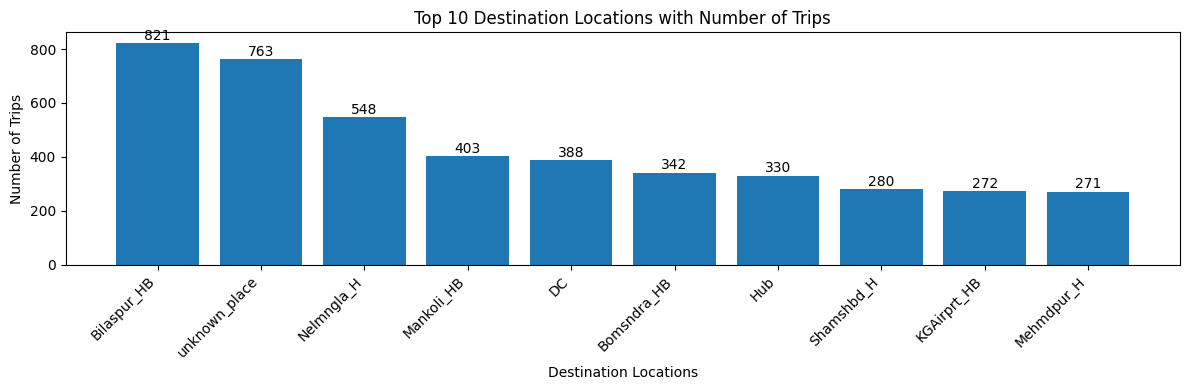

In [ ]:
top_10_source_cities = ab['source_place'].value_counts().head(10)
plt.figure(figsize=(12, 4))
plt.bar(top_10_source_cities.index, top_10_source_cities.values)
plt.xlabel("Source Locations")
plt.ylabel("Number of Trips")
plt.title("Top 10 Source Locations with Number of Trips")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_source_cities.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()
top_10_source_cities = ab['destination_place'].value_counts().head(10)
plt.figure(figsize=(12, 4))
plt.bar(top_10_source_cities.index, top_10_source_cities.values)
plt.xlabel("Destination Locations")
plt.ylabel("Number of Trips")
plt.title("Top 10 Destination Locations with Number of Trips")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_source_cities.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

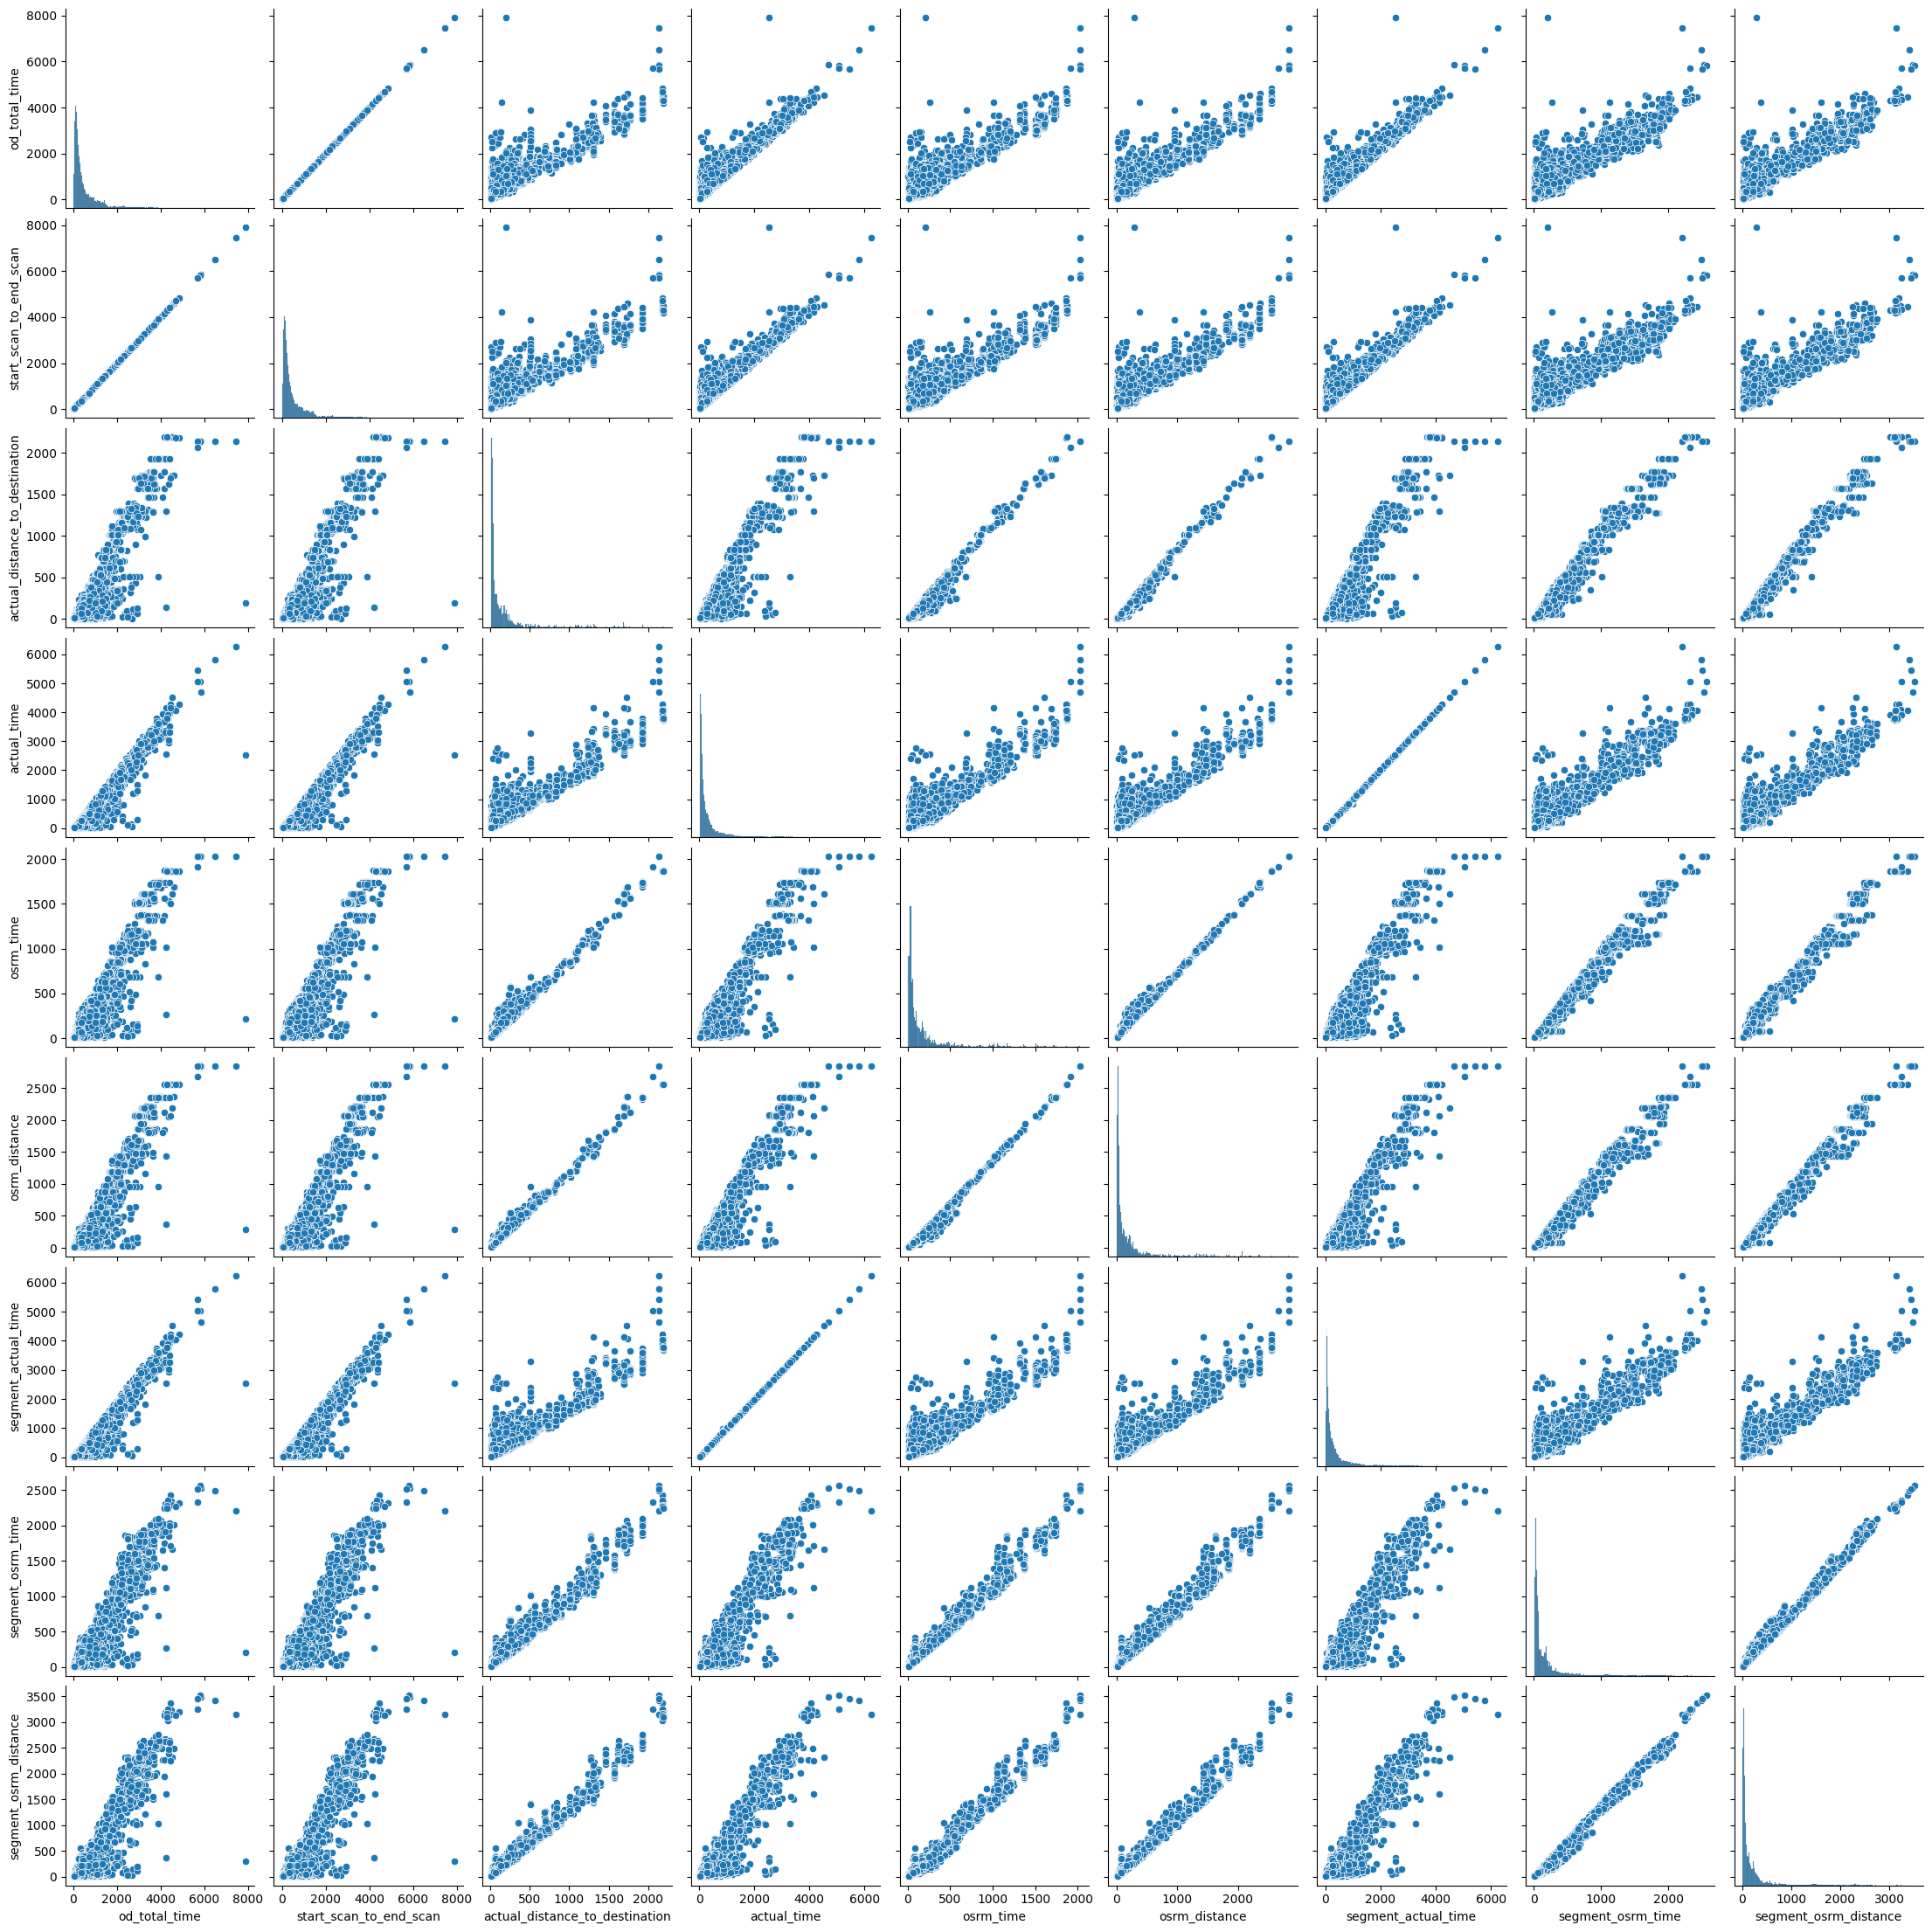

In [ ]:
columns_for_pairplot = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(ab[columns_for_pairplot])
plt.show()

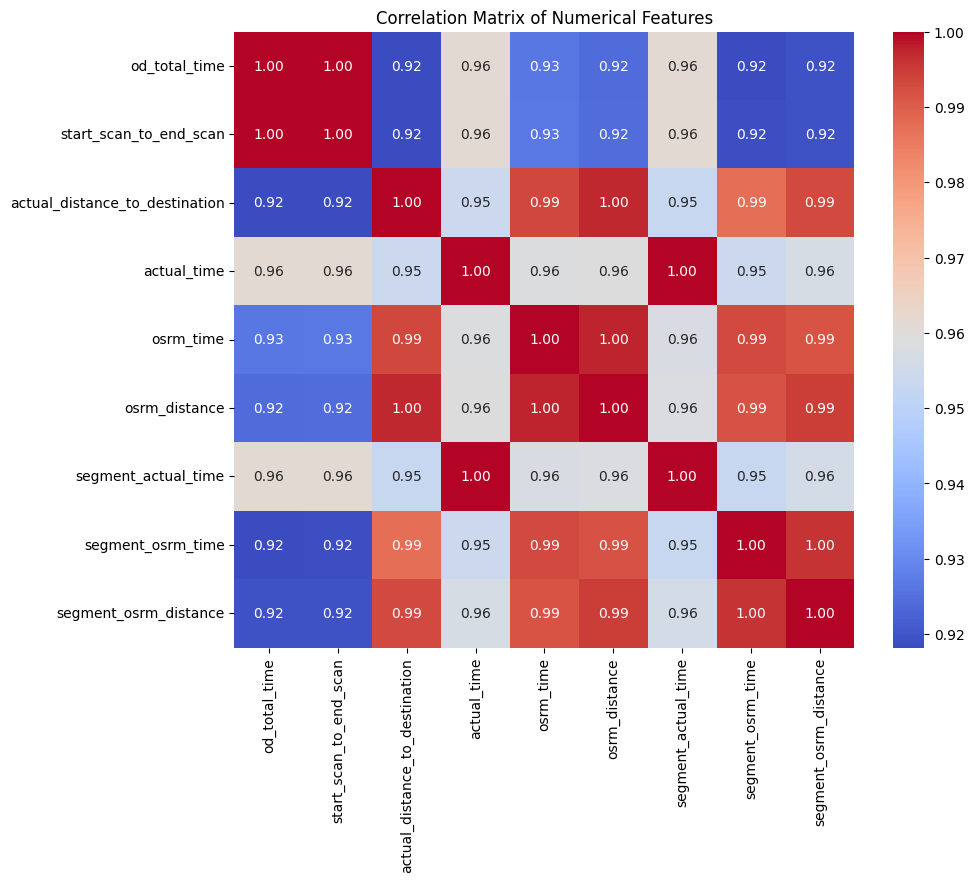

In [ ]:
correlation_matrix = ab[columns_for_pairplot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
stat_od, p_od = stats.shapiro(ab['od_total_time'])
stat_scan, p_scan = stats.shapiro(ab['start_scan_to_end_scan'])
print(f"Shapiro-Wilk Test for od_total_time: Statistics={stat_od:.3f}, p={p_od:.3f}")
print(f"Shapiro-Wilk Test for start_scan_to_end_scan: Statistics={stat_scan:.3f}, p={p_scan:.3f}")
alpha = 0.05
if p_od > alpha and p_scan > alpha:
    t_statistic, p_value = stats.ttest_rel(ab['od_total_time'], ab['start_scan_to_end_scan'])
    test_name = "Paired t-test"
else:
    t_statistic, p_value = stats.wilcoxon(ab['od_total_time'], ab['start_scan_to_end_scan'])
    test_name = "Wilcoxon signed-rank test"
print(f"\n{test_name}:")
print(f"Statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < alpha:
    print("The means of od_total_time and start_scan_to_end_scan are significantly different.")
else:
    print("There is no significant difference between the means of od_total_time and start_scan_to_end_scan.")

Shapiro-Wilk Test for od_total_time: Statistics=0.669, p=0.000
Shapiro-Wilk Test for start_scan_to_end_scan: Statistics=0.668, p=0.000

Wilcoxon signed-rank test:
Statistic: 0.000
P-value: 0.000
The means of od_total_time and start_scan_to_end_scan are significantly different.


[]

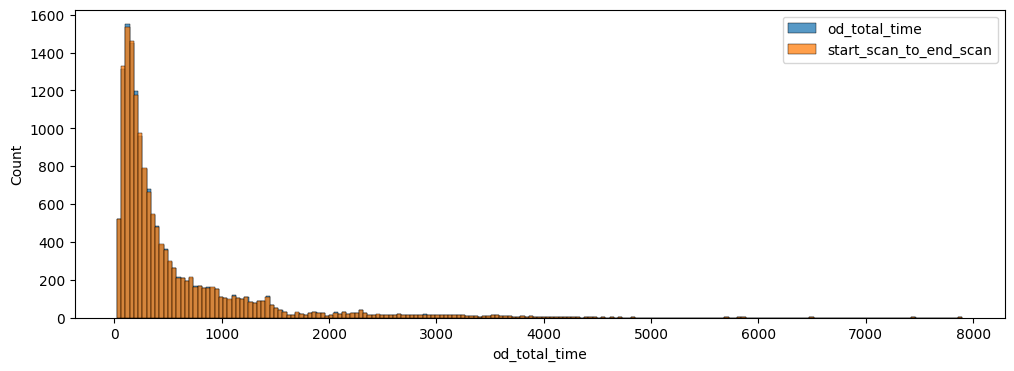

In [ ]:
plt.figure(figsize = (12, 4))
sns.histplot(ab['od_total_time'])
sns.histplot(ab['start_scan_to_end_scan'])
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.plot()

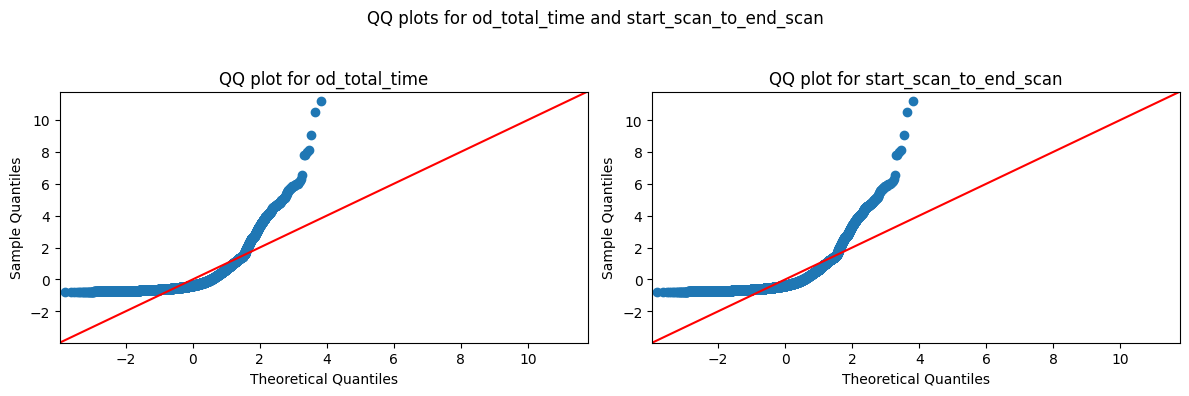

In [ ]:
plt.figure(figsize=(12, 4))
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
plt.subplot(1, 2, 1)
sm.qqplot(ab['od_total_time'], line='45', fit=True, ax=plt.gca())  # Use the current axis
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
sm.qqplot(ab['start_scan_to_end_scan'], line='45', fit=True, ax=plt.gca())  # Use the current axis
plt.title('QQ plot for start_scan_to_end_scan')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

Shapiro-Wilk Test for actual_time: Statistics=0.582, p=0.000
Shapiro-Wilk Test for osrm_time: Statistics=0.547, p=0.000

Wilcoxon signed-rank test:
Statistic: 95811.500
P-value: 0.000
The means of actual_time and osrm_time are significantly different.


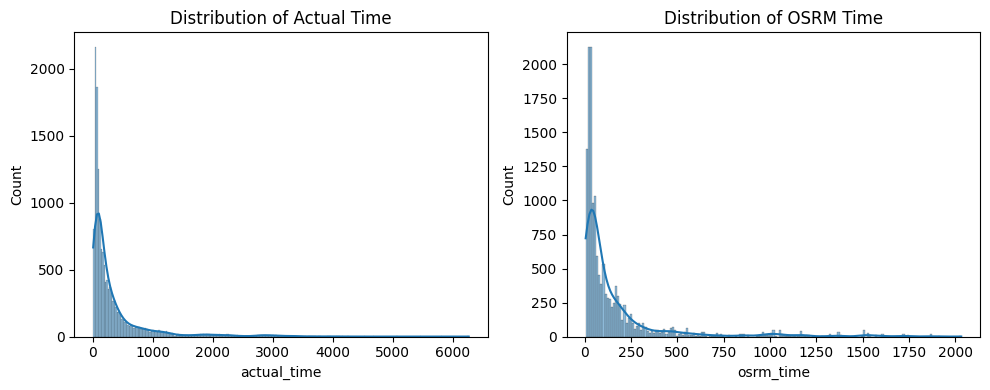

In [ ]:
alpha = 0.05
stat_actual, p_actual = stats.shapiro(ab['actual_time'])
stat_osrm, p_osrm = stats.shapiro(ab['osrm_time'])
print(f"Shapiro-Wilk Test for actual_time: Statistics={stat_actual:.3f}, p={p_actual:.3f}")
print(f"Shapiro-Wilk Test for osrm_time: Statistics={stat_osrm:.3f}, p={p_osrm:.3f}")
if p_actual > alpha and p_osrm > alpha:
    t_statistic, p_value = stats.ttest_rel(ab['actual_time'], ab['osrm_time'])
    test_name = "Paired t-test"
else:
    t_statistic, p_value = stats.wilcoxon(ab['actual_time'], ab['osrm_time'])
    test_name = "Wilcoxon signed-rank test"
print(f"\n{test_name}:")
print(f"Statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < alpha:
    print("The means of actual_time and osrm_time are significantly different.")
else:
    print("There is no significant difference between the means of actual_time and osrm_time.")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(ab['actual_time'], kde=True)
plt.title('Distribution of Actual Time')
plt.subplot(1, 2, 2)
sns.histplot(ab['osrm_time'], kde=True)
plt.title('Distribution of OSRM Time')
plt.tight_layout()
plt.show()

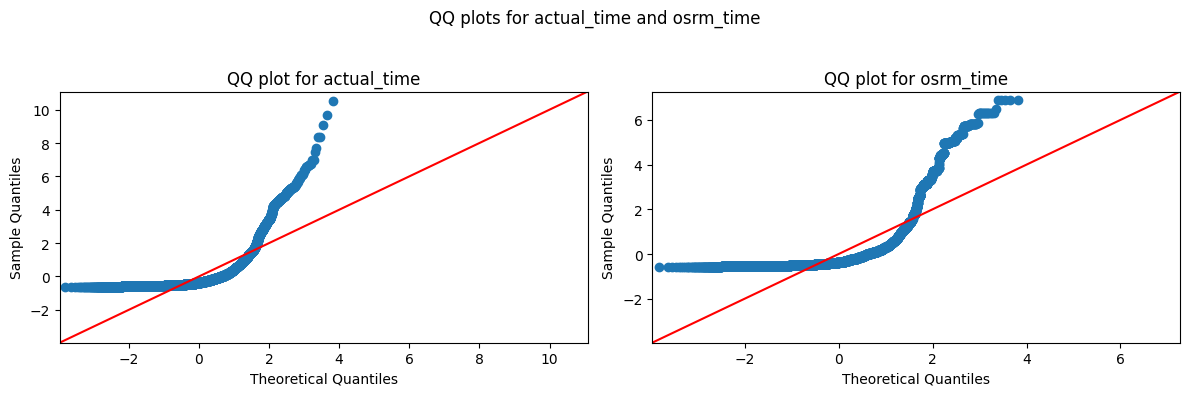

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
sm.qqplot(ab['actual_time'], line='45', fit=True, ax=plt.gca())
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
sm.qqplot(ab['osrm_time'], line='45', fit=True, ax=plt.gca())
plt.title('QQ plot for osrm_time')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Shapiro-Wilk Test for osrm_distance: Statistics=0.523, p=0.000
Shapiro-Wilk Test for segment_osrm_distance: Statistics=0.508, p=0.000

Wilcoxon signed-rank test:
Statistic: 11163808.500
P-value: 0.000
The means of osrm_distance and segment_osrm_distance are significantly different.


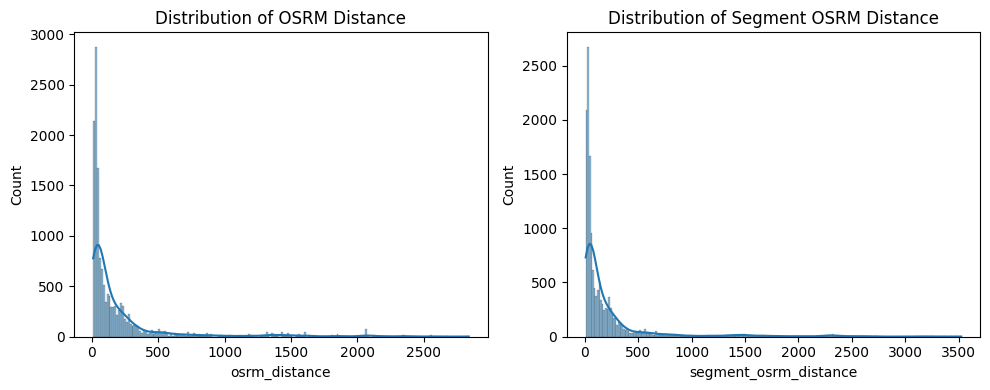

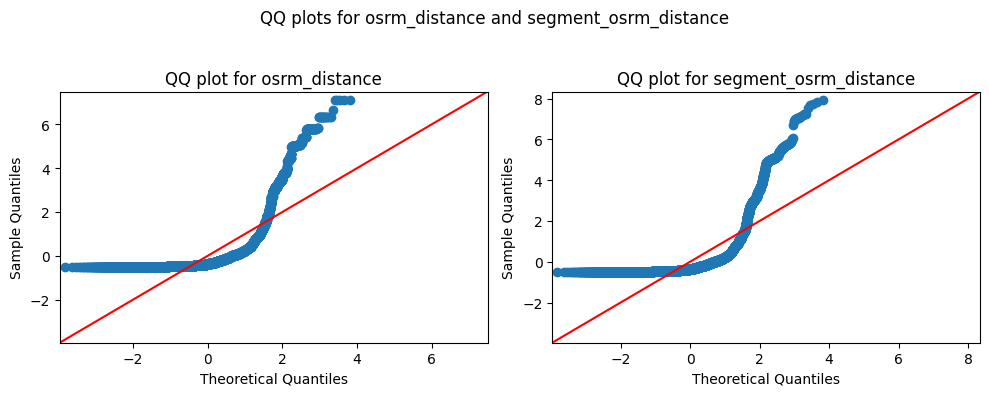

In [ ]:
alpha = 0.05
stat_osrm_dist, p_osrm_dist = stats.shapiro(ab['osrm_distance'])
stat_seg_osrm_dist, p_seg_osrm_dist = stats.shapiro(ab['segment_osrm_distance'])
print(f"Shapiro-Wilk Test for osrm_distance: Statistics={stat_osrm_dist:.3f}, p={p_osrm_dist:.3f}")
print(f"Shapiro-Wilk Test for segment_osrm_distance: Statistics={stat_seg_osrm_dist:.3f}, p={p_seg_osrm_dist:.3f}")
if p_osrm_dist > alpha and p_seg_osrm_dist > alpha:
    t_statistic, p_value = stats.ttest_rel(ab['osrm_distance'], ab['segment_osrm_distance'])
    test_name = "Paired t-test"
else:
    t_statistic, p_value = stats.wilcoxon(ab['osrm_distance'], ab['segment_osrm_distance'])
    test_name = "Wilcoxon signed-rank test"
print(f"\n{test_name}:")
print(f"Statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < alpha:
    print("The means of osrm_distance and segment_osrm_distance are significantly different.")
else:
    print("There is no significant difference between the means of osrm_distance and segment_osrm_distance.")


# Visualizations (Histograms and QQ plots)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(ab['osrm_distance'], kde=True)
plt.title('Distribution of OSRM Distance')
plt.subplot(1, 2, 2)
sns.histplot(ab['segment_osrm_distance'], kde=True)
plt.title('Distribution of Segment OSRM Distance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
sm.qqplot(ab['osrm_distance'], line='45', fit=True, ax=plt.gca())
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
sm.qqplot(ab['segment_osrm_distance'], line='45', fit=True, ax=plt.gca())
plt.title('QQ plot for segment_osrm_distance')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Shapiro-Wilk Test for osrm_time: Statistics=0.547, p=0.000
Shapiro-Wilk Test for segment_osrm_time: Statistics=0.533, p=0.000

Wilcoxon signed-rank test:
Statistic: 13377866.500
P-value: 0.000
The means of osrm_time and segment_osrm_time are significantly different.


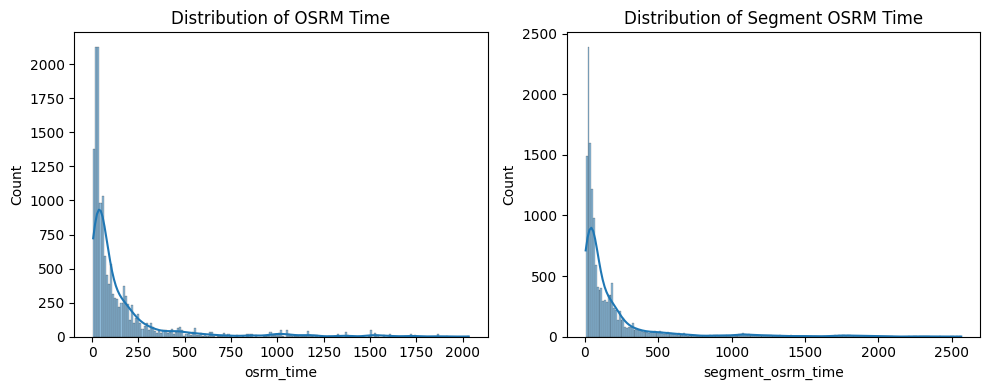

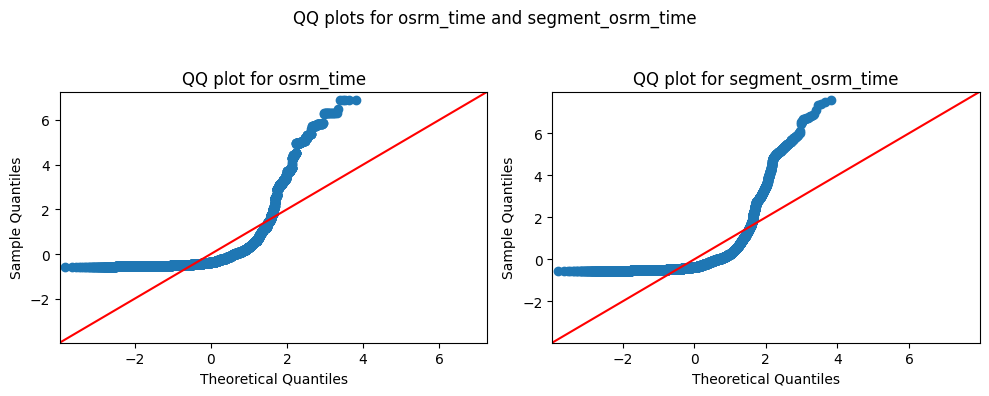

In [ ]:
alpha = 0.05
stat_osrm, p_osrm = stats.shapiro(ab['osrm_time'])
stat_seg_osrm, p_seg_osrm = stats.shapiro(ab['segment_osrm_time'])
print(f"Shapiro-Wilk Test for osrm_time: Statistics={stat_osrm:.3f}, p={p_osrm:.3f}")
print(f"Shapiro-Wilk Test for segment_osrm_time: Statistics={stat_seg_osrm:.3f}, p={p_seg_osrm:.3f}")
if p_osrm > alpha and p_seg_osrm > alpha:
    t_statistic, p_value = stats.ttest_rel(ab['osrm_time'], ab['segment_osrm_time'])
    test_name = "Paired t-test"
else:
    t_statistic, p_value = stats.wilcoxon(ab['osrm_time'], ab['segment_osrm_time'])
    test_name = "Wilcoxon signed-rank test"
print(f"\n{test_name}:")
print(f"Statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < alpha:
    print("The means of osrm_time and segment_osrm_time are significantly different.")
else:
    print("There is no significant difference between the means of osrm_time and segment_osrm_time.")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(ab['osrm_time'], kde=True)
plt.title('Distribution of OSRM Time')
plt.subplot(1, 2, 2)
sns.histplot(ab['segment_osrm_time'], kde=True)
plt.title('Distribution of Segment OSRM Time')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
sm.qqplot(ab['osrm_time'], line='45', fit=True, ax=plt.gca())
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
sm.qqplot(ab['segment_osrm_time'], line='45', fit=True, ax=plt.gca())
plt.title('QQ plot for segment_osrm_time')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Outliers in od_total_time: [2260.1099999999997, 3934.3599999999997, 2338.38, 2303.0, 1795.27, 2253.11, 2418.02, 1552.3799999999999, 1599.09, 1390.34, 2391.56, 1749.26, 2167.91, 2127.32, 2326.44, 3072.88, 1678.65, 3182.62, 1496.37, 3108.07, 1456.31, 2306.8, 2311.43, 1433.5, 1408.16, 1490.09, 3463.25, 1436.79, 1920.63, 1435.79, 2455.66, 1372.49, 3278.43, 1509.69, 2176.04, 1719.3200000000002, 1582.19, 2052.7, 2367.44, 1451.13, 1422.1599999999999, 1405.49, 1412.99, 3785.94, 1854.1399999999999, 2325.74, 1589.62, 2642.56, 2872.24, 1598.27, 1878.24, 2542.98, 2628.36, 2263.81, 2547.53, 2125.89, 1880.6699999999998, 1532.72, 1443.5500000000002, 1476.79, 2492.38, 2654.76, 1530.85, 3897.53, 1577.37, 3830.69, 1595.76, 2599.61, 1899.9, 3230.81, 2619.3, 3227.16, 2119.88, 1964.66, 2300.56, 2170.7799999999997, 1440.88, 1710.41, 1393.05, 2990.11, 3411.0299999999997, 1376.34, 2476.03, 2048.57, 1422.17, 1719.49, 1396.16, 2588.08, 1533.08, 2825.27, 1444.77, 1505.92, 1822.85, 1565.91, 1912.56, 3340.46, 1480

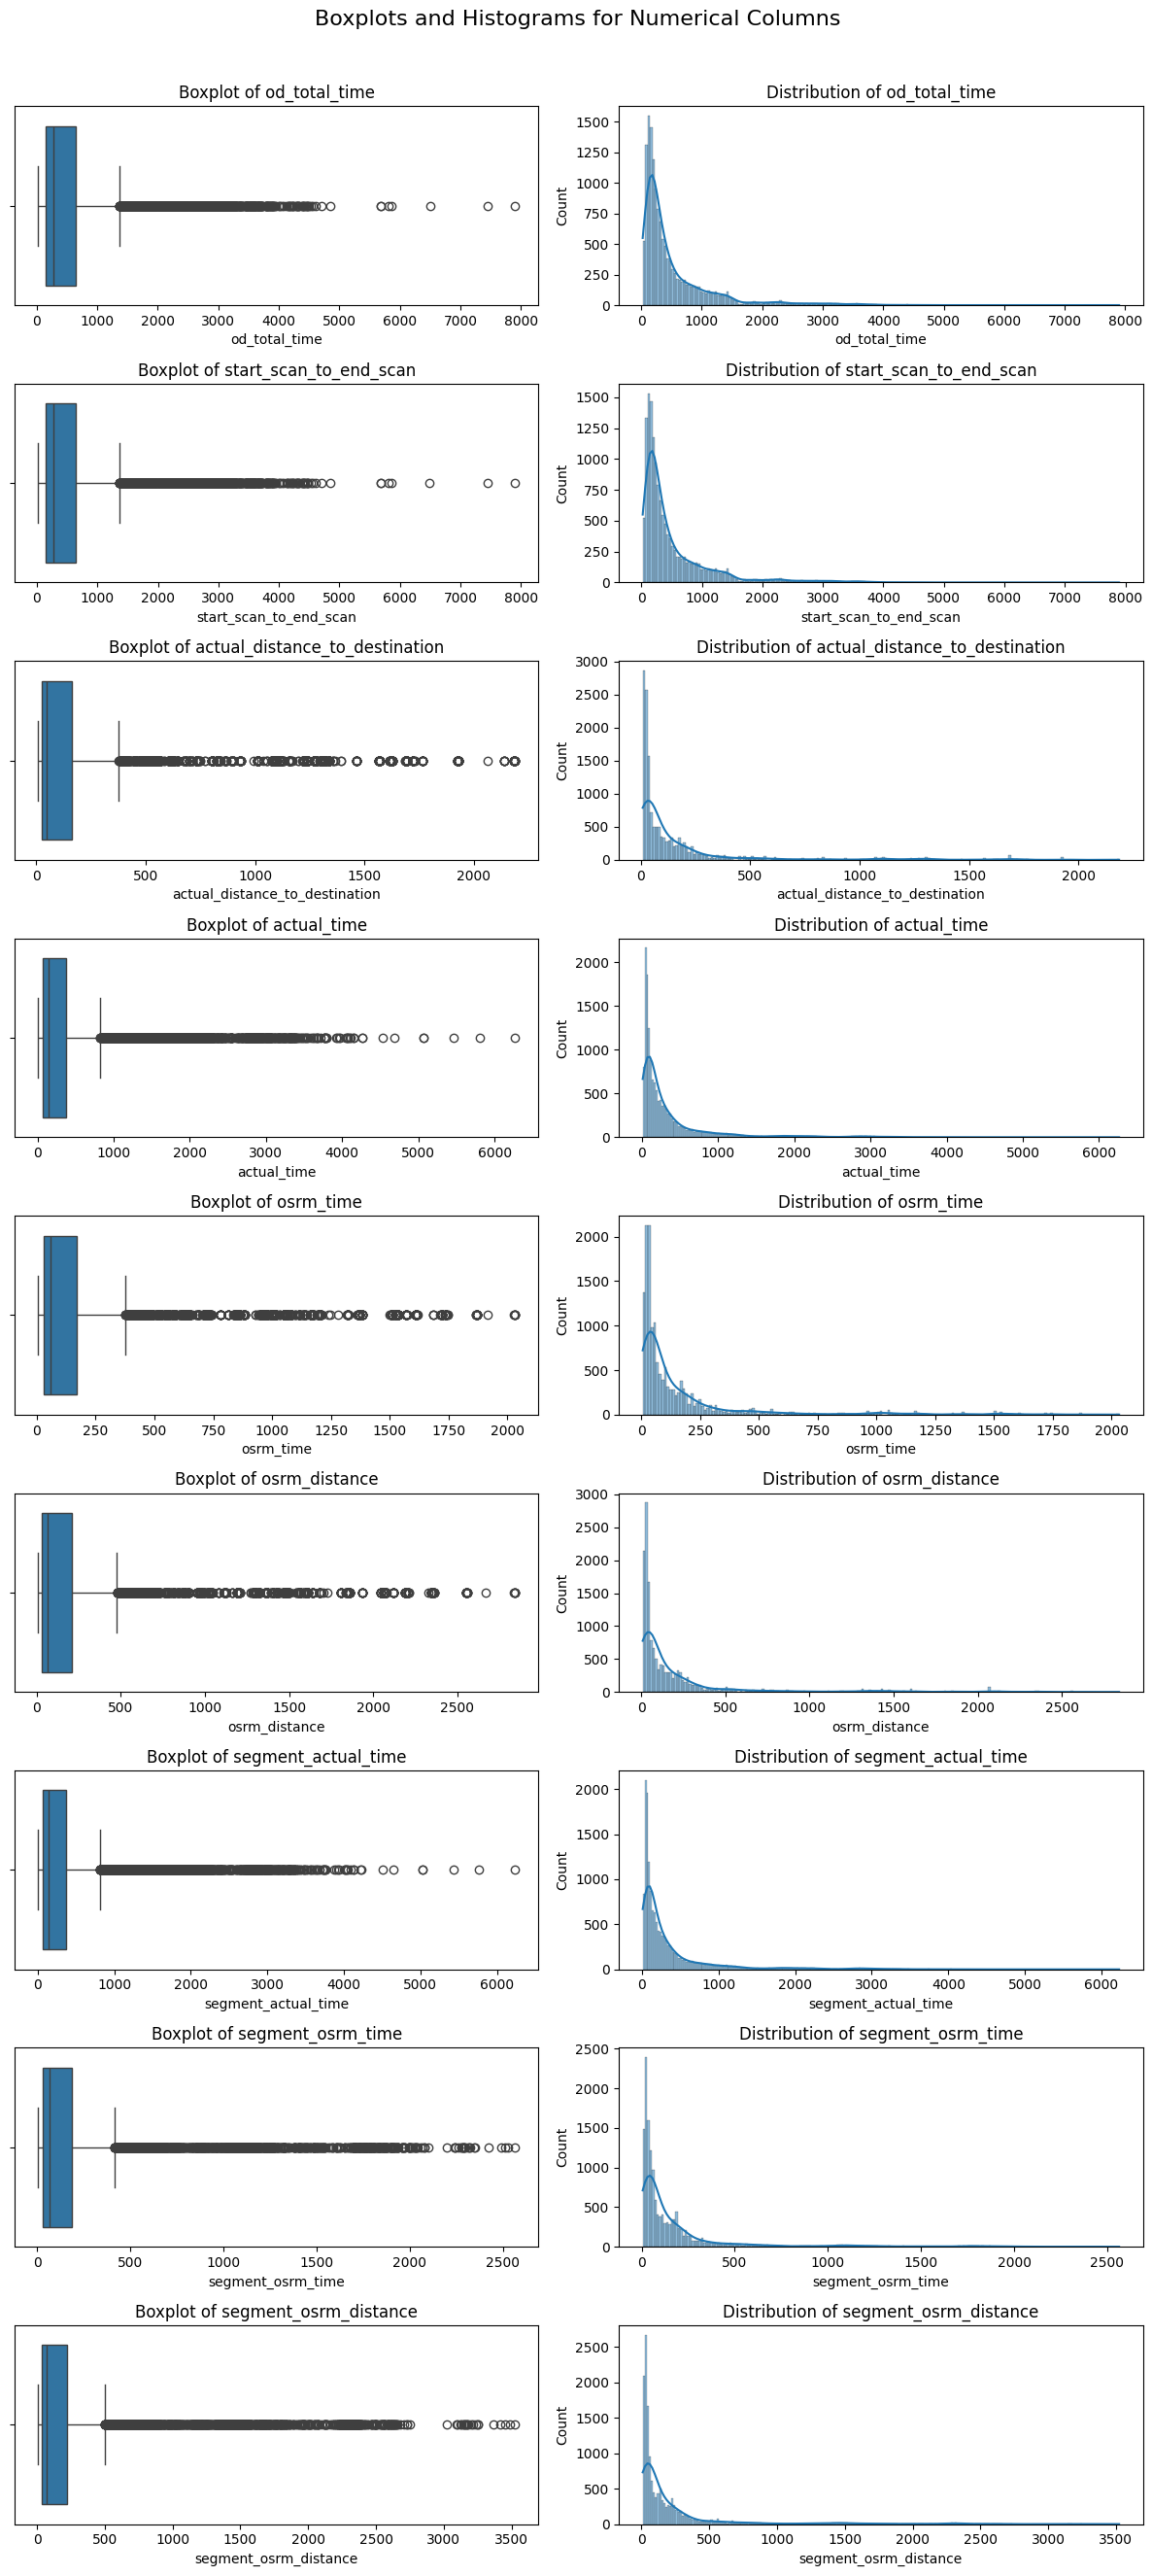

In [ ]:
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers
numerical_cols = [
    'od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
    'segment_osrm_time', 'segment_osrm_distance'
]
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols) * 3))
fig.suptitle('Boxplots and Histograms for Numerical Columns', fontsize=16)
for i, col in enumerate(numerical_cols):
    outliers = find_outliers_iqr(ab[col])
    print(f"Outliers in {col}: {outliers.tolist()}")
    sns.boxplot(x=ab[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col}')
    sns.histplot(ab[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col}')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the suptitle
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_cols = [
    'od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
    'segment_osrm_time', 'segment_osrm_distance'
]
scaler = MinMaxScaler()
ab[numerical_cols] = scaler.fit_transform(ab[numerical_cols])
print(ab.head())

                 trip_uuid source_center destination_center  \
0  trip-153671041653548748  IND209304AAA       IND209304AAA   
1  trip-153671042288605164  IND561203AAB       IND561203AAB   
2  trip-153671043369099517  IND000000ACB       IND000000ACB   
3  trip-153671046011330457  IND400072AAB       IND401104AAA   
4  trip-153671052974046625  IND583101AAA       IND583119AAA   

          trip_creation_time                         source_name  \
0 2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1 2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
2 2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
3 2018-09-12 00:01:00.113710            Mumbai Hub (Maharashtra)   
4 2018-09-12 00:02:09.740725              Bellary_Dc (Karnataka)   

                     destination_name  od_total_time  start_scan_to_end_scan  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       0.284016                0.283937   
1   Doddablpur_ChikaDPP_D (Karnataka)       0.020082

In [ ]:

---

### **Insights**
1. **Data Overview**:
   - The dataset spans from **2018-09-12 00:00:16** to **2018-10-08 03:00:24**.
   - Contains **14,817 unique trip IDs**, **1,508 unique source centers**, and **1,481 unique destination centers**.
   - The data includes trips categorized into **testing** and **training**, with a higher proportion of testing data.

2. **Route Type**:
   - The most frequent route type is **Carting**, indicating its dominance in logistics operations.

3. **Missing Data**:
   - There are **missing names** for 14 unique source and destination locations, identified through null entries in `source_name` and `destination_name`.

4. **Trip Patterns**:
   - **Peak Hour**: Trips increase post-noon, peak at **10 PM**, and decline afterward.
   - **Week 38** has the highest trip creation activity.
   - Maximum orders are placed mid-month, suggesting a pattern in customer behavior.

5. **Geographical Trends**:
   - **Top Source States**: Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana.
   - **Top Destination States**: Maharashtra, Karnataka, Haryana, Tamil Nadu, Uttar Pradesh.
   - **Top Source Cities**: Mumbai, Gurgaon, Delhi, Bengaluru, Bhiwandi.
   - **Top Destination Cities**: Mumbai, Bengaluru, Gurgaon, Delhi, Chennai.

6. **Feature Relationships**:
   - **Similar Features**:
     - `start_scan_to_end_scan` and `od_total_time`.
     - `start_scan_to_end_scan` and `segment_actual_time`.
   - **Different Features**:
     - `actual_time` and `osrm_time`.
     - `osrm_distance` and `segment_osrm_distance`.

---

### **Recommendations**
1. **Improve OSRM Trip Planning**:
   - Address discrepancies between **osrm_time** and **actual_time** to enhance delivery time predictions.
   - Reduce the gap between **osrm_distance** and the actual distance covered by ensuring adherence to predefined routes or optimizing OSRM configurations for real-world conditions like traffic.

2. **Enhance Logistics Corridors**:
   - Strengthen operational efficiency in states like **Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh**, where demand is highest.

3. **Focus on High-Demand Cities**:
   - Optimize resources in cities like **Mumbai, Bengaluru, Gurgaon, Delhi, and Chennai**, which account for a significant volume of trips.

4. **Address Missing Data**:
   - Ensure that missing `source_name` and `destination_name` values are updated with meaningful identifiers to maintain data integrity.

5. **Customer Profiling**:
   - Conduct detailed profiling of customers in high-order states to better understand buying behaviors and improve service delivery.

6. **Plan for Peak Times**:
   - Utilize trip patterns (e.g., mid-month surges and peak evening hours) to plan resources and staffing more effectively.

7. **Monitor Feature Performance**:
   - Analyze statistical differences in related features (e.g., `osrm_time` vs. `actual_time`) to identify potential inefficiencies in operations or data inaccuracies.

---


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-507-6d78cbbc2999>, line 5)